In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.uniform()

0.29997864749372605

In [22]:

def simulate_gauntlet(n_games, n_simulations, p_lose=0.5):
    n_games_arr = np.zeros(n_simulations)
    for i in range(n_simulations):
        curr_game = 0
        n_rounds = 0
        while curr_game < n_games:
            p_win_random = np.random.uniform()
            if p_win_random < p_lose and curr_game > 0:
                curr_game -= 1
            elif p_win_random > p_lose:
                curr_game += 1
            n_rounds += 1

        n_games_arr[i] = n_rounds

    return n_games_arr

simulate_gauntlet(10, 1)

array([19.])

In [32]:
arr = simulate_gauntlet(10, 100000)

In [65]:
arr2 = simulate_gauntlet(10, 1000000)

In [43]:
n_relays = 5000
mult_sims = np.zeros(n_relays)

for i in range(n_relays):
    if i % 100 == 0:
        print(i)
    mult_sims[i] = np.mean(simulate_gauntlet(10, 200))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


(array([297., 717., 858., 766., 761., 701., 565., 583., 453., 435., 412.,
        361., 332., 275., 274., 203., 226., 191., 160., 154., 121., 102.,
        116.,  86.,  93.,  86.,  88.,  61.,  59.,  43.,  35.,  29.,  44.,
         29.,  24.,  20.,  28.,  27.,  20.,  17.,  18.,  16.,   7.,  16.,
          7.,   6.,   9.,   7.,   4.,   7.,  11.,   3.,   5.,   3.,   4.,
          3.,   2.,   3.,   2.,   0.,   2.,   1.,   1.,   1.,   2.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 10.  ,  19.67,  29.34,  39.01,  48.68,  58.35,  68.02,  77.69,
         87.36,  97.03, 106.7 , 116.37, 126.04, 135.71, 145.38, 155.05,
        164.72, 174.39, 184.06, 193.73, 203.4 , 213.07, 222.74, 232.41,
        242.08, 251.75, 261.42, 271.09, 280.76, 290.43, 300.1 , 309.77,
        319.44, 329.11, 338.78

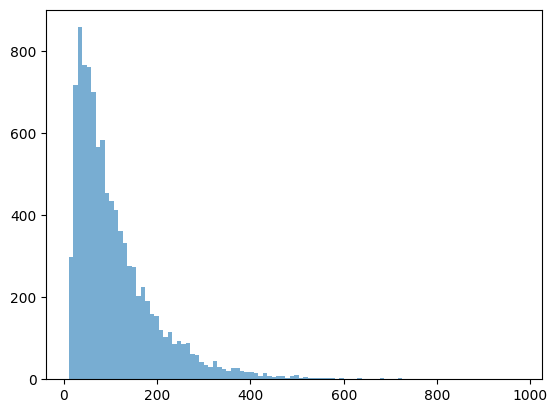

In [24]:
plt.hist(arr, bins = 100, alpha = 0.6)

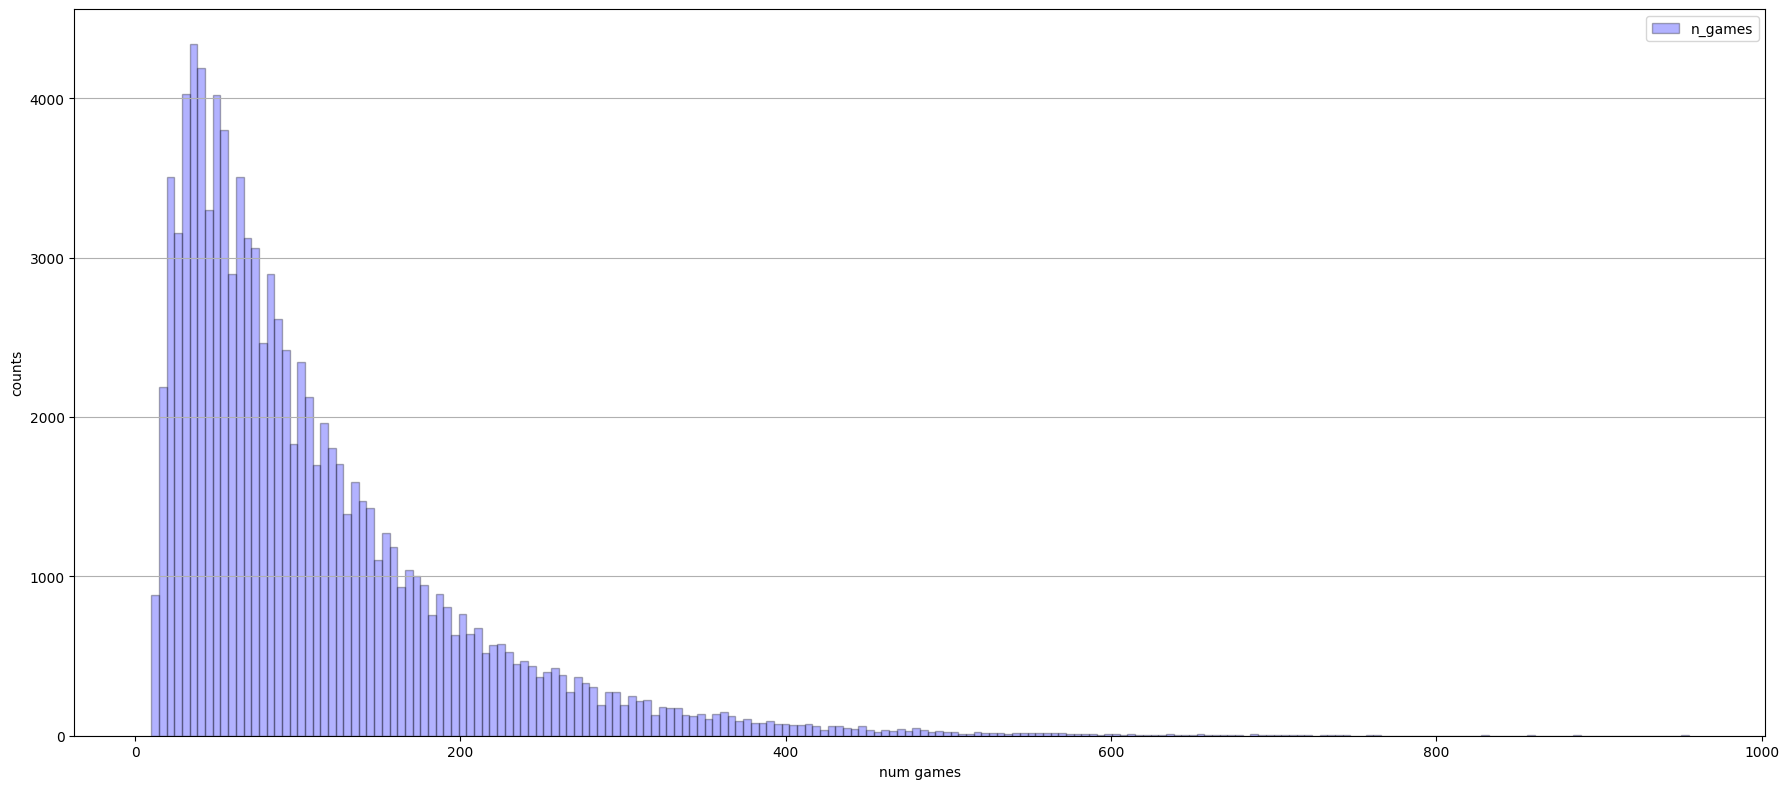

In [69]:
fig, ax = plt.subplots(figsize=(18, 8))      # Create just a single figure and axes (figsize is in inches!)
hist_prob_b_bjets = ax.hist(arr, bins=200, alpha = 0.3, linewidth=1, edgecolor='black', label='n_games', color='blue')

ax.set_xlabel("num games")     # Label of x-axis
ax.set_ylabel("counts")                                            # Label of y-axis
                                      # Title of plot
#ax.set_yscale("log")
ax.legend(loc='best')                                                        # Legend. Could also be 'upper right'
ax.grid(axis='y')

fig.tight_layout()


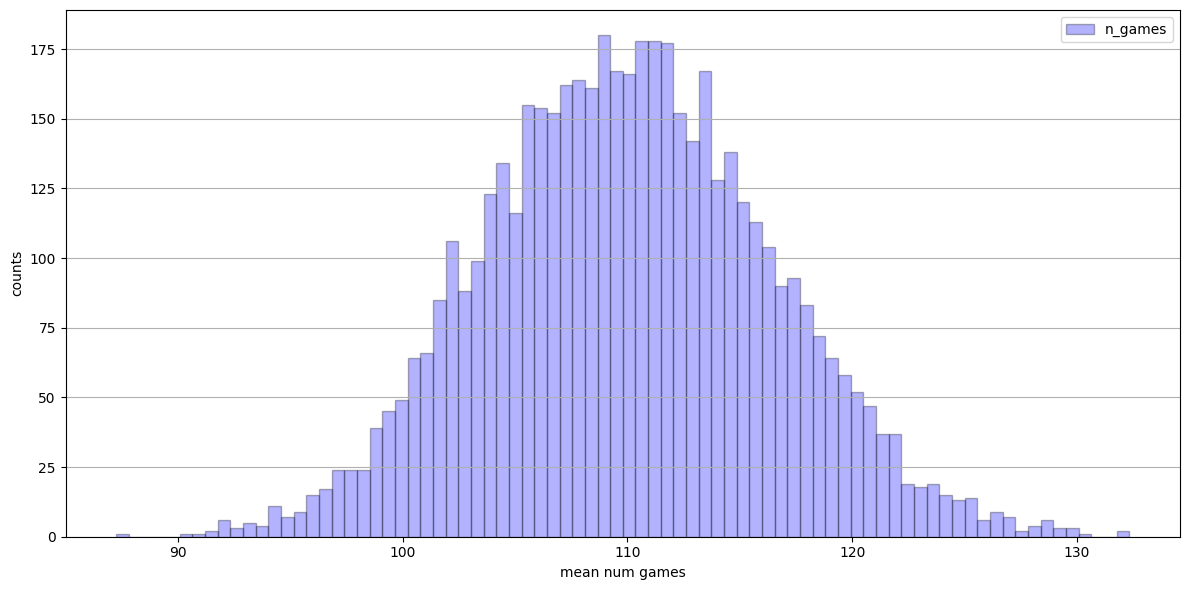

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))      # Create just a single figure and axes (figsize is in inches!)
hist_prob_b_bjets = ax.hist(mult_sims, bins=80, alpha = 0.3, linewidth=1, edgecolor='black', label='n_games', color='blue')

ax.set_xlabel("mean num games")     # Label of x-axis
ax.set_ylabel("counts")                                            # Label of y-axis
                                      # Title of plot
#ax.set_yscale("log")
ax.legend(loc='best')                                                        # Legend. Could also be 'upper right'
ax.grid(axis='y')

fig.tight_layout()


In [49]:
np.mean(arr)

109.97136

In [70]:
import numpy as np
from scipy import stats

# Assuming your data is in a NumPy array called `data`
data = np.array([arr])  # Replace with your actual data

# Fit the exponential distribution to the data
loc, scale = stats.expon.fit(data, floc=0)  # Fix loc to 0 for exponential distribution

# The scale parameter of the exponential distribution is 1/λ
lambda_estimate = 1 / scale

# Calculate the standard error of the estimate
# Standard error for the scale parameter in exponential distribution is scale/sqrt(n)
standard_error = scale / np.sqrt(len(data))

# Calculate the expected value (mean of the fitted distribution)
expected_value = scale

# Output the results
print(f"Estimated λ: {lambda_estimate}")
print(f"Uncertainty in λ: {standard_error}")
print(f"Expected value (mean): {expected_value}")


Estimated λ: 0.00909327664948401
Uncertainty in λ: 109.97136
Expected value (mean): 109.97136


Estimated λ: 0.00909327664948401
Uncertainty in λ: 0.3477599749863345
Expected value (mean): 109.97136


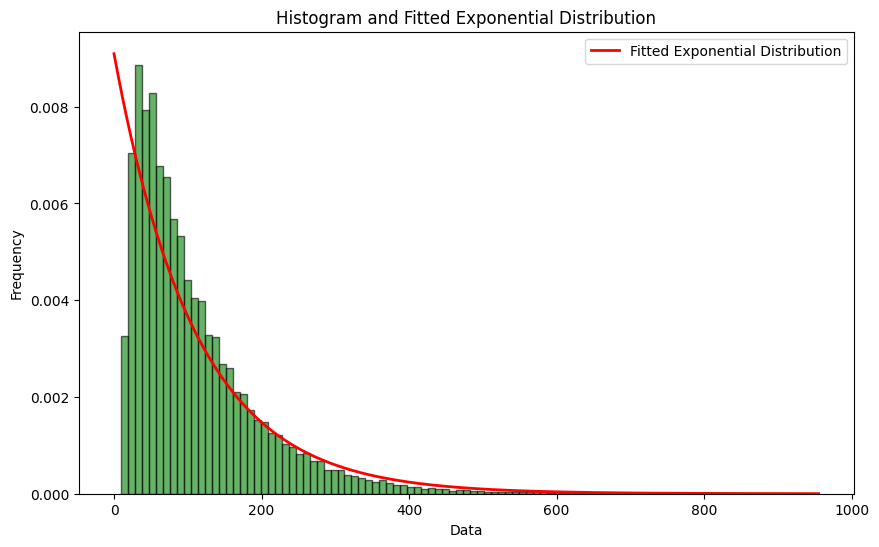

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Ensure data is a 1-dimensional array
data = data.flatten()

# Fit the exponential distribution to the data
loc, scale = stats.expon.fit(data, floc=0)  # Fix loc to 0 for exponential distribution

# The scale parameter of the exponential distribution is 1/λ
lambda_estimate = 1 / scale

# Calculate the standard error of the estimate
standard_error = scale / np.sqrt(len(data))

# Calculate the expected value (mean of the fitted distribution)
expected_value = scale

# Print the results
print(f"Estimated λ: {lambda_estimate}")
print(f"Uncertainty in λ: {standard_error}")
print(f"Expected value (mean): {expected_value}")

# Plotting the histogram and the fitted exponential distribution
plt.figure(figsize=(10, 6))

# Plot the histogram of the data
count, bins, ignored = plt.hist(data, bins=100, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the fitted exponential distribution
x = np.linspace(0, max(data), 1000)
pdf_fitted = stats.expon.pdf(x, loc, scale)
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Fitted Exponential Distribution')

plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram and Fitted Exponential Distribution')
plt.legend()
plt.show()


In [55]:
data

array([Ellipsis], dtype=object)

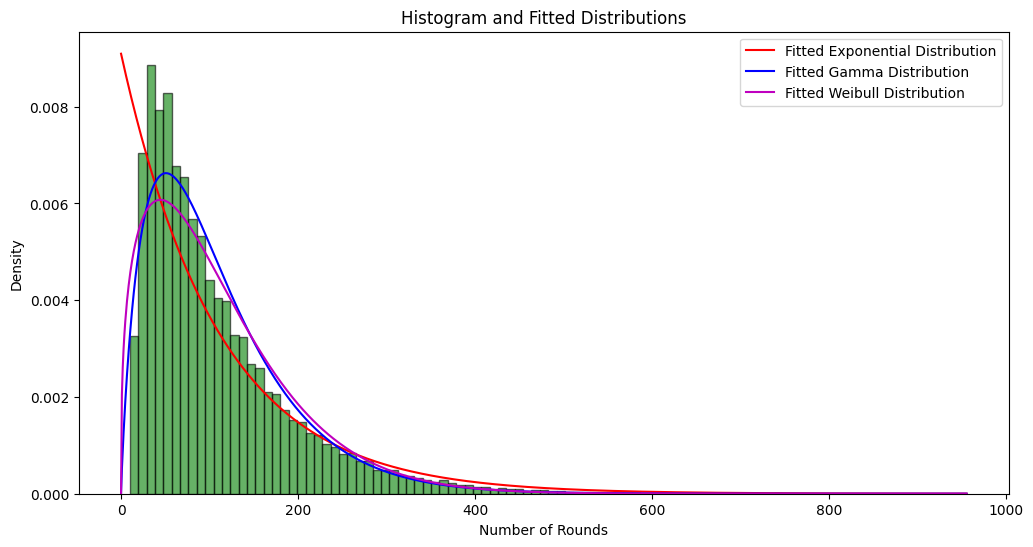

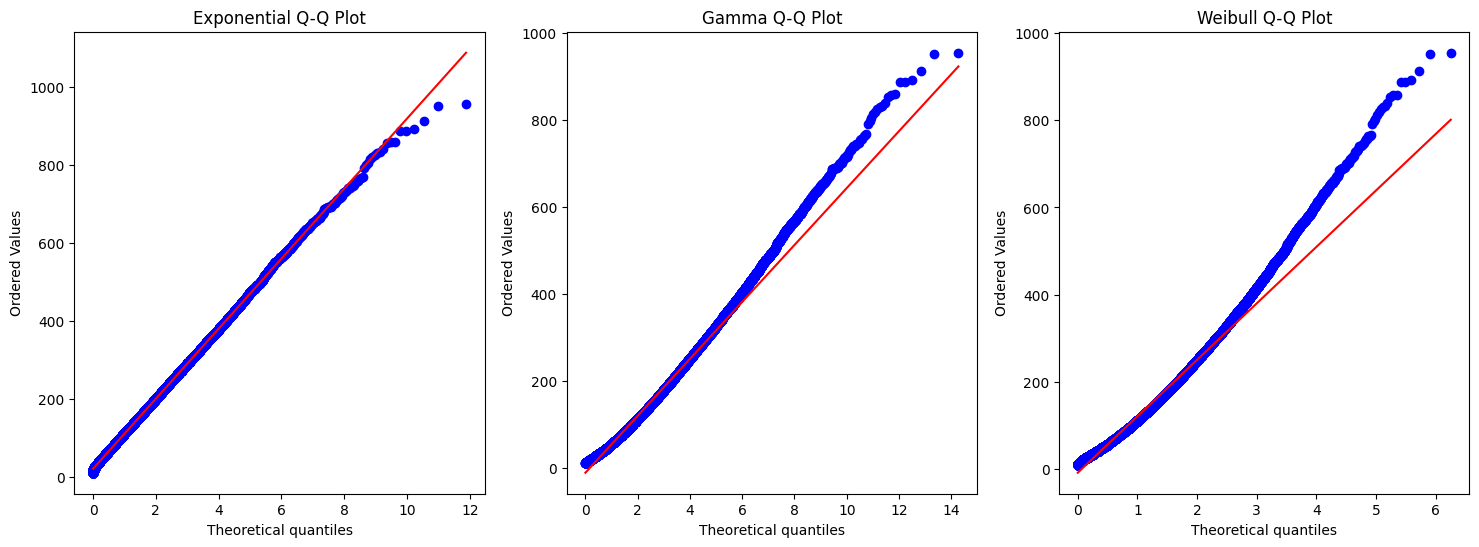

In [72]:

# Plot histogram of the data
plt.figure(figsize=(12, 6))
plt.hist(arr, bins=100, density=True, alpha=0.6, color='g', edgecolor='black')

# Fit and plot exponential distribution
loc, scale = stats.expon.fit(arr, floc=0)
x = np.linspace(0, max(arr), 1000)
pdf_expon = stats.expon.pdf(x, loc, scale)
plt.plot(x, pdf_expon, 'r-', label='Fitted Exponential Distribution')

# Fit and plot gamma distribution
alpha, loc, beta = stats.gamma.fit(arr, floc=0)
pdf_gamma = stats.gamma.pdf(x, alpha, loc, beta)
plt.plot(x, pdf_gamma, 'b-', label='Fitted Gamma Distribution')

# Fit and plot Weibull distribution
c, loc, scale = stats.weibull_min.fit(arr, floc=0)
pdf_weibull = stats.weibull_min.pdf(x, c, loc, scale)
plt.plot(x, pdf_weibull, 'm-', label='Fitted Weibull Distribution')

plt.xlabel('Number of Rounds')
plt.ylabel('Density')
plt.title('Histogram and Fitted Distributions')
plt.legend()
plt.show()

# Probability plots for better comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Exponential Q-Q plot
stats.probplot(arr, dist="expon", plot=axs[0])
axs[0].set_title('Exponential Q-Q Plot')

# Gamma Q-Q plot
stats.probplot(arr, dist="gamma", sparams=(alpha,), plot=axs[1])
axs[1].set_title('Gamma Q-Q Plot')

# Weibull Q-Q plot
stats.probplot(arr, dist="weibull_min", sparams=(c,), plot=axs[2])
axs[2].set_title('Weibull Q-Q Plot')

plt.show()

Gamma distribution parameters: alpha=1.857117873302898, loc=0, beta=59.21614431743911


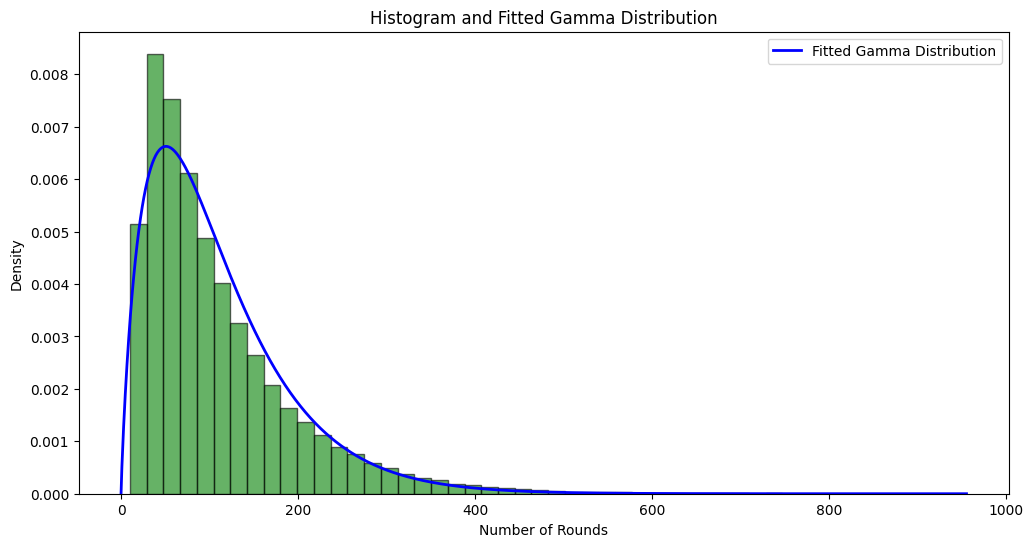

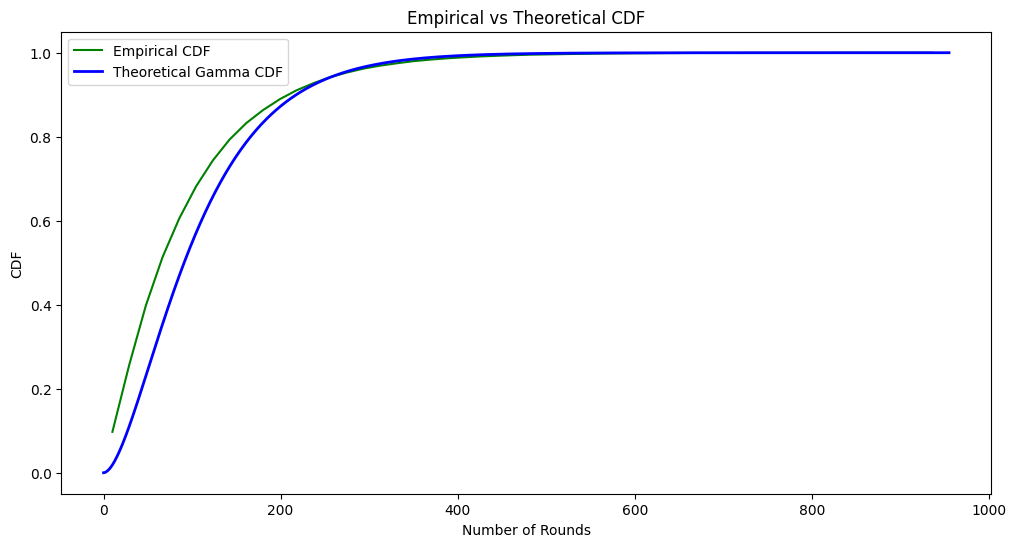

In [73]:

# Fit the gamma distribution
alpha, loc, beta = stats.gamma.fit(arr, floc=0)

# Print the gamma distribution parameters
print(f"Gamma distribution parameters: alpha={alpha}, loc={loc}, beta={beta}")

# Plot histogram of the data
plt.figure(figsize=(12, 6))
count, bins, ignored = plt.hist(arr, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the fitted gamma distribution
x = np.linspace(0, max(arr), 1000)
pdf_gamma = stats.gamma.pdf(x, alpha, loc, beta)
plt.plot(x, pdf_gamma, 'b-', lw=2, label='Fitted Gamma Distribution')

plt.xlabel('Number of Rounds')
plt.ylabel('Density')
plt.title('Histogram and Fitted Gamma Distribution')
plt.legend()
plt.show()

# Compare empirical and theoretical CDFs
ecdf = np.cumsum(count) / np.sum(count)
plt.figure(figsize=(12, 6))
plt.plot(bins[:-1], ecdf, 'g-', label='Empirical CDF')
plt.plot(x, stats.gamma.cdf(x, alpha, loc, beta), 'b-', lw=2, label='Theoretical Gamma CDF')
plt.xlabel('Number of Rounds')
plt.ylabel('CDF')
plt.title('Empirical vs Theoretical CDF')
plt.legend()
plt.show()

In [64]:
len(arr)

100000

In [74]:
import numpy as np

def expected_steps(n):
    T = np.zeros(n)
    T[n-1] = 0  # T_n-1 = 0

    for i in range(n-2, -1, -1):
        T[i] = 1 + 0.5 * T[i+1] + 0.5 * T[i-1 if i-1 >= 0 else 0]

    return T[0]

# Example for n = 10
n = 10
print(f"Expected number of steps to reach game {n-1} from game 0: {expected_steps(n)}")


Expected number of steps to reach game 9 from game 0: 1.99609375
